In [116]:
import os

import cv2
import numpy as np
import imutils

from imutils import paths
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import measure
from skimage import feature

import pylab as plt
%matplotlib inline

In [2]:
def exibir_imagens(list_process=None):
    if isinstance(list_process, list):
        for obj in list_process:
            plt.figure()
            plt.title(s=obj.get('title', ''))
            plt.xticks(obj.get('xticks', []))
            plt.yticks(obj.get('yticks', []))
            plt.imshow(X=obj.get('X'), cmap=obj.get('cmap', None))
            plt.tight_layout()
    else:
        obj = list_process
        plt.figure()
        plt.title(s=obj.get('title', ''))
        plt.xticks(obj.get('xticks', []))
        plt.yticks(obj.get('yticks', []))
        plt.imshow(X=obj.get('X'), cmap=obj.get('cmap', None))
        plt.tight_layout()
        

# 1 - Detectar formas geométricas

In [3]:
path = os.getcwd() + os.sep
png = path + '../../db_images/png/captcha.png'
jpeg = path + '../../db_images/jpeg/captcha.jpeg'
other = path + '../../db_aulas/Imagens/tetris_blocks.png'

path_images = [other]

In [4]:
images = []
for path_img in path_images: 
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    it = {'title': 'Original',
          'X': img}
    images.append(it)

grays = []
for obj in images:
    gray = cv2.cvtColor(obj['X'], cv2.COLOR_BGR2GRAY)
    it = {'cmap': 'gray',
          'title': 'Original Gray',
          'X': gray}
    grays.append(it)

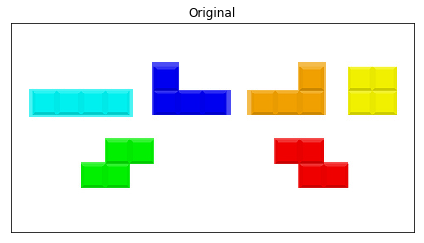

In [5]:
exibir_imagens(images)

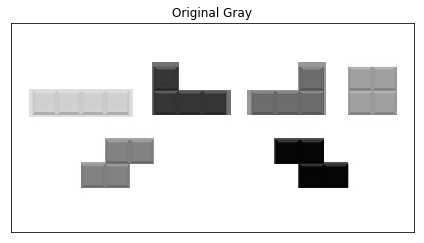

In [6]:
exibir_imagens(grays)

In [7]:
contours = []
for i in range(len(images)):
    gray = grays[i].copy()
    img = images[i].copy()

    img_gray = gray.get('X').copy()
    origin = img.get('X').copy()

    #img_gray = cv2.medianBlur(img_gray, 5)
    #img_gray = cv2.GaussianBlur(img_gray, (5,5), 0.)

    img_gray[(img_gray[:,:] > 233)] = 0

    (_, cnts, hierarquia) = cv2.findContours(img_gray, 
                                             cv2.RETR_EXTERNAL,
                                             cv2.CHAIN_APPROX_SIMPLE)
    clone = img.get('X').copy()
    cv2.drawContours(clone, cnts, -1, (255,0,255), 3)

    img.update({'X': clone})
    contours.append(img)

    gray.update({'X': img_gray, 'cnts': cnts, 'origin': origin, 'gray': img_gray})
    contours.append(gray)

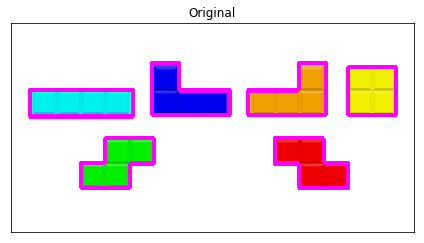

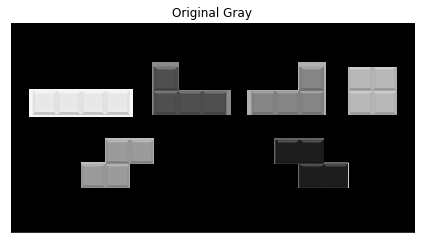

In [8]:
exibir_imagens(contours)

In [9]:
objetos = []
for img_contour in contours:
    if img_contour.get('cnts'):
        cnts = img_contour.get('cnts')
        for i, c in enumerate(cnts):
            img = img_contour.copy()
            
            clone = img.get('origin').copy()
            
            mask = np.zeros(img.get('X').shape, dtype='uint8')
            cv2.drawContours(mask, [c], -1, 255, -1)
            
            clone_gray = img.get('gray').copy()
            
            mask_gray = np.zeros(img.get('X').shape, dtype='uint8')
            cv2.drawContours(mask_gray, [c], -1, 255, -1)
            
            img.update(
                {
                    'title': str((i))+' Image + Mask',
                    'X': cv2.bitwise_and(clone, clone, mask=mask),
                    'index': i,
                    'gray':  cv2.bitwise_and(clone_gray, clone_gray, mask=mask_gray),
                }
            )
            objetos.append(img)

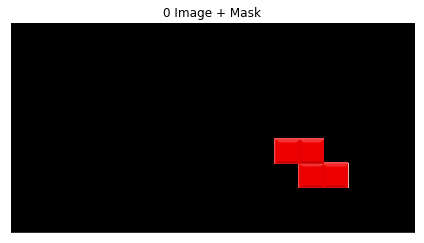

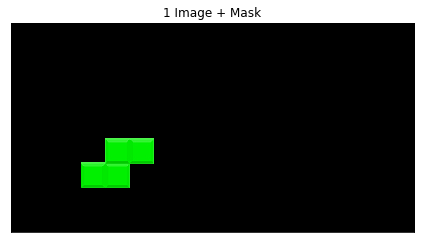

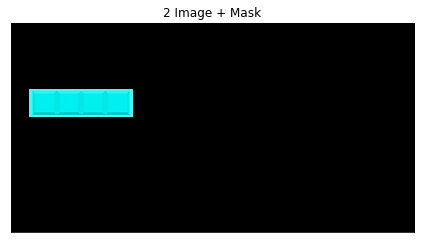

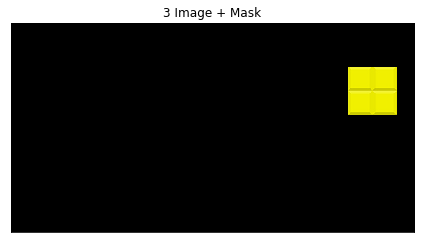

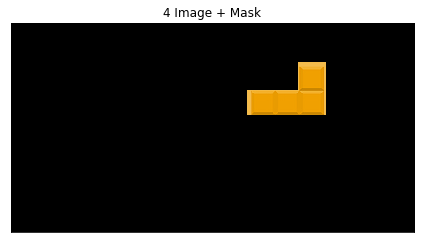

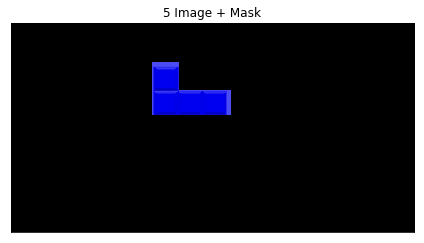

In [10]:
exibir_imagens(objetos)

In [11]:
rects_objs = []
for obj in objetos:
    it = obj.copy()
    cnts = it.get('cnts').copy()
    for i, c in enumerate(cnts):
        if it.get('index') == i:
            it = obj.copy()
            clone = it.get('X').copy()

            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(clone, (x,y), (x+w,y+h), (255,0,255), 2)

            it.update({'X': clone})
            rects_objs.append(it)

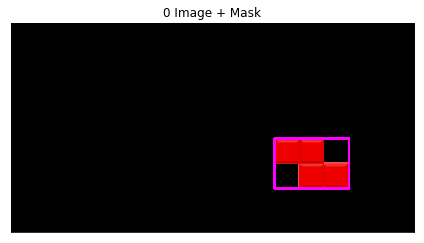

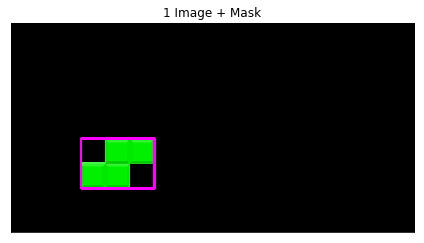

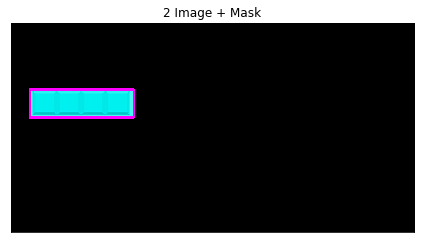

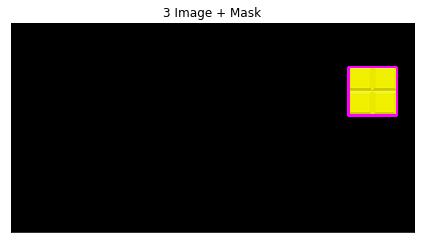

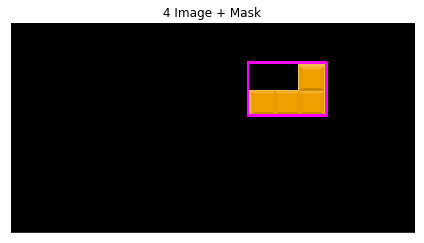

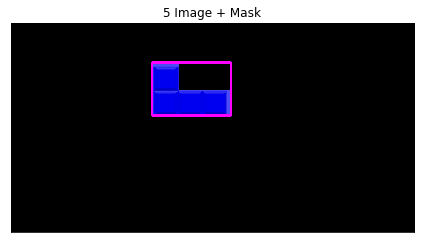

In [12]:
exibir_imagens(rects_objs)

In [19]:
for obj in objetos:
    it = obj.copy()

    gray = it.get('gray').copy()
    gray[(gray != 0)] = 1 # binary
    it.update({'X': gray})

    sample_image = it.get('X')
    label_img = measure.label(sample_image, neighbors=8) # neighbors 4 or 8
    props = measure.regionprops(label_img,  intensity_image=sample_image)

    print('id:\n{}\n'.format(it.get('index')))
    print('H:\n{}\n'.format(measure.shannon_entropy(it.get('X'), np.e)))
    print('area:\n{}\n'.format(props[0].area))
    print('bbox:\n{}\n'.format(props[0].bbox))
    print('bbox_area:\n{}\n'.format(props[0].bbox_area))
    print('centroid:\n{}\n'.format(props[0].centroid))
    print('convex_area:\n{}\n'.format(props[0].convex_area)) # not 3d
    print('convex_image:\n{}\n'.format(props[0].convex_image)) # not 3d
    print('coords:\n{}\n'.format(props[0].coords))
    print('eccentricity:\n{}\n'.format(props[0].eccentricity))  # not 3d
    print('equivalent_diameter:\n{}\n'.format(props[0].equivalent_diameter))
    print('euler_number:\n{}\n'.format(props[0].euler_number))  # not 3d
    print('extent:\n{}\n'.format(props[0].extent))
    print('filled_area:\n{}\n'.format(props[0].filled_area))
    print('filled_image:\n{}\n'.format(props[0].filled_image))
    print('image:\n{}\n'.format(props[0].image))
    print('inertia_tensor:\n{}\n'.format(props[0].inertia_tensor)) # not 3d
    print('inertia_tensor_eigvals:\n{}\n'.format(props[0].inertia_tensor_eigvals)) # not 3d
    print('intensity_image:\n{}\n'.format(props[0].intensity_image))
    print('local_centroid:\n{}\n'.format(props[0].local_centroid)) # not 3d
    print('major_axis_length:\n{}\n'.format(props[0].major_axis_length)) # not 3d
    print('max_intensity:\n{}\n'.format(props[0].max_intensity))
    print('mean_intensity:\n{}\n'.format(props[0].mean_intensity))
    print('min_intensity:\n{}\n'.format(props[0].min_intensity))
    print('minor_axis_length:\n{}\n'.format(props[0].minor_axis_length)) # not 3d
    print('moments:\n{}\n'.format(props[0].moments))  # not 3d
    print('moments_central:\n{}\n'.format(props[0].moments_central))  # not 3d
    print('moments_hu:\n{}\n'.format(props[0].moments_hu))  # not 3d
    print('moments_normalized:\n{}\n'.format(props[0].moments_normalized))  # not 3d
    print('orientation:\n{}\n'.format(props[0].orientation)) # not 3d
    print('perimeter:\n{}\n'.format(props[0].perimeter)) # not 3d and obrigatório binary
    print('solidity:\n{}\n'.format(props[0].solidity)) # not 3d
    print('weighted_centroid:\n{}\n'.format(props[0].weighted_centroid)) # not 3d
    print('weighted_local_centroid:\n{}\n'.format(props[0].weighted_local_centroid)) # not 3d
    print('weighted_moments:\n{}\n'.format(props[0].weighted_moments)) # not 3d
    print('weighted_moments_central:\n{}\n'.format(props[0].weighted_moments_central)) # not 3d
    print('weighted_moments_hu:\n{}\n'.format(props[0].weighted_moments_hu)) # not 3d
    print('weighted_moments_normalized:\n{}\n'.format(props[0].weighted_moments_normalized)) # not 3d

    print()

id:
0

H:
8.204124932574041

area:
3656

bbox:
(138, 314, 198, 403)

bbox_area:
120500

centroid:
(167.5082056892779, 357.98386214442013)

convex_area:
4440

convex_image:
[[ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]

coords:
[[138 314]
 [138 315]
 [138 316]
 ..., 
 [197 400]
 [197 401]
 [197 402]]

eccentricity:
0.8631982223315521

equivalent_diameter:
68.22729494529118

euler_number:
1

extent:
0.6846441947565544

filled_area:
3656

filled_image:
[[ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]

image:
[[ True  True  True ..., False False Fal

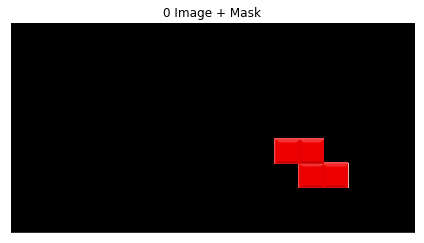

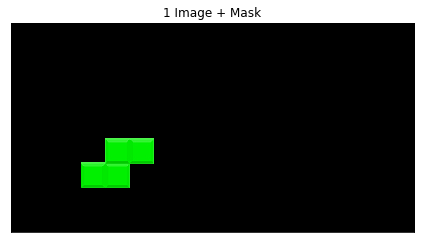

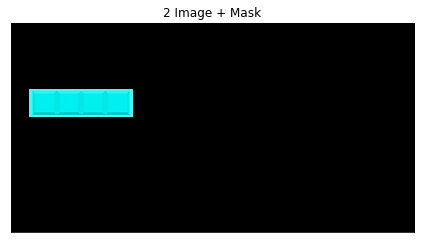

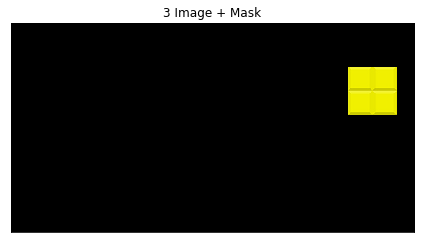

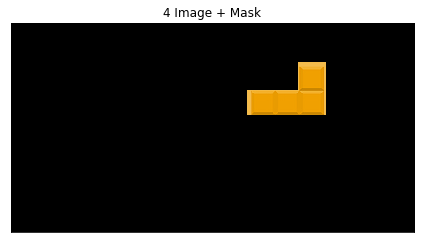

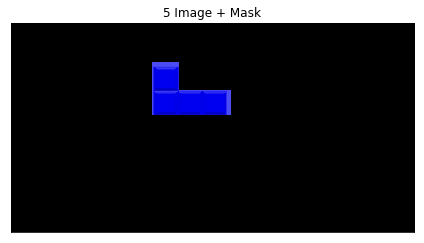

In [14]:
exibir_imagens(objetos)

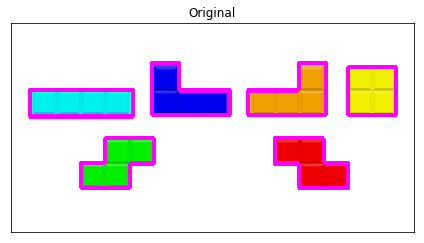

In [15]:
exibir_imagens(contours[0])

In [114]:
text_objects = []
for img_contour in contours:
    if img_contour.get('cnts'):
        cnts = img_contour.get('cnts').copy()
        for i, c in enumerate(cnts):
            img = img_contour.copy()
            
            clone = img.get('origin').copy()
            
            mask = np.zeros(img.get('X').shape, dtype='uint8')
            cv2.drawContours(mask, [c], -1, 255, -1)
            
            clone_gray = img.get('gray').copy()
            
            mask_gray = np.zeros(img.get('X').shape, dtype='uint8')
            cv2.drawContours(mask_gray, [c], -1, 255, -1)
            
            it = objetos[i].copy()

            gray = it.get('gray').copy()
            gray[(gray != 0)] = 1 # binary
            it.update({'X': gray})

            sample_image = it.get('X')
            label_img = measure.label(sample_image, neighbors=8) # neighbors 4 or 8
            props = measure.regionprops(label_img,  intensity_image=sample_image)
            
            area = cv2.contourArea(c)
            perimeter = cv2.arcLength(c, True)
            (x, y, w, h) = cv2.boundingRect(c)
            eccentricity = props[0].eccentricity
            orientation = props[0].orientation
            
            M = cv2.moments(c)
            cx = int(M["m10"]/M["m00"]) 
            cy = int(M["m01"]/M["m00"])
            
            print(
                (
                    "Contorno #{}\narea: {:.2f}, perimetro: {:.2f}\n"
                    "eccentricity: {:.2f}\n"
                    "orientation: {:.2}\n"
                ).format(i, area, perimeter, eccentricity, orientation)
            )        

            result_X = cv2.bitwise_and(clone, clone, mask=mask)
            
            cv2.circle(result_X, (cx,cy), 3, (255, 255,255), -1)
            
            label_name = i
            
            if eccentricity == 0: 
                label_name = 'Quardrado'
            elif abs(orientation) == 0:
                label_name = 'Retangulo'
            elif abs(eccentricity) > 0.80 and 0.40 < abs(orientation) < 60:
                label_name = 'Peca Z'
            elif abs(eccentricity) > 0.80 and 0.0 < abs(orientation) < 40:
                label_name = 'Peca L'
            
            cv2.putText(result_X, "{}".format(label_name), (cx+(-w//2), cy+(-h*3//4)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,255), 2)
            
            img.update(
                {
                    'title': str((i))+' Image + Mask',
                    'X': result_X,
                    'index': i,
                }
            )
            text_objects.append(img)

Contorno #0
area: 3510.00, perimetro: 291.66
eccentricity: 0.86
orientation: -0.55

Contorno #1
area: 3452.00, perimetro: 290.83
eccentricity: 0.86
orientation: 0.55

Contorno #2
area: 3936.00, perimetro: 310.00
eccentricity: 0.96
orientation: -0.0

Contorno #3
area: 3249.00, perimetro: 228.00
eccentricity: 0.00
orientation: 0.79

Contorno #4
area: 3753.50, perimetro: 309.41
eccentricity: 0.86
orientation: 0.35

Contorno #5
area: 3753.50, perimetro: 309.41
eccentricity: 0.86
orientation: -0.35



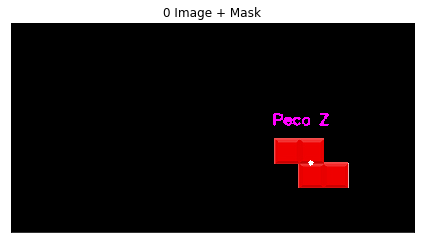

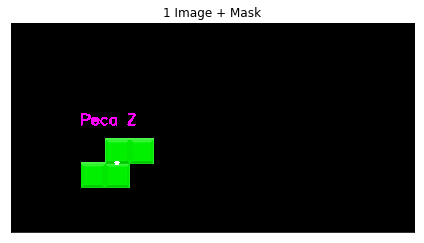

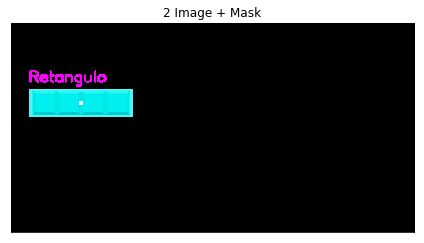

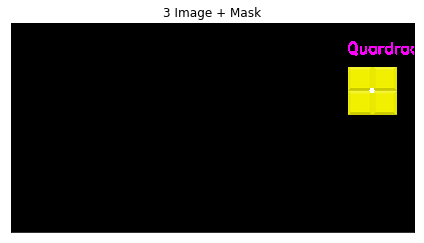

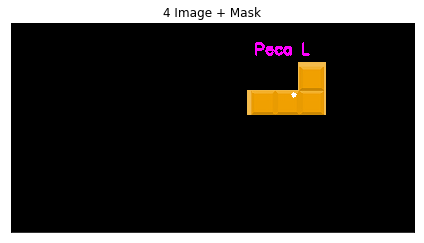

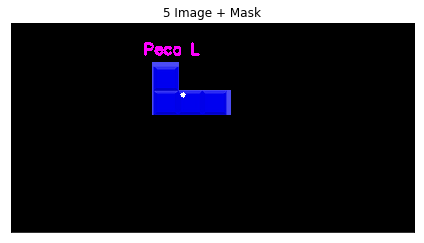

In [115]:
exibir_imagens(text_objects)

# 2 - Detectar logos de carro teste script

In [141]:
def hog_detectar_texture(args):
    data = []
    labels = []

    for imagePath in paths.list_images(args["training"]):
        # extract the make of the car
        make = imagePath.split("/")[-2]

        # load the image, convert it to grayscale, and detect edges or binarize

        ######[CODE HERE]#######
        img = cv2.imread(imagePath, 0)
        gray = img
        ######[END CODE]#######

        # find contours in the edge map, keeping only the largest one which
        # is presumed to be the car logo

        #####[CODE HERE]#######
        ret,thresh = cv2.threshold(gray,127,255,0)
        im2,cnts,hierarchy = cv2.findContours(thresh, 1, 2)
        c = max(cnts, key=cv2.contourArea)
        #####[END CODE]#######


        # extract the logo of the car and resize it to a canonical width
        # and height
        (x, y, w, h) = cv2.boundingRect(c)
        logo = gray[y:y + h, x:x + w]
        logo = cv2.resize(logo, (200, 100))

        # extract Histogram of Oriented Gradients from the logo
        #####[CODE HERE]#######
        (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(20, 20), 
                                    cells_per_block=(2,2), transform_sqrt=True, visualise=True) 

        #####[END CODE]#######
        # update the data and labels
        data.append(H)
        labels.append(make)

    # "train" the nearest neighbors classifier
    print("[INFO] training classifier...")
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(data, labels)
    print("[INFO] evaluating...")

    for imagePath in paths.list_images(args["test"]):
        # load the test image, convert it to grayscale, and resize it to
        # the canonical size
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        logo = cv2.resize(gray, (200, 100))

        # extract Histogram of Oriented Gradients from the test image and
        # predict the make of the car
        (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(20, 20),
                cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
        pred = model.predict(H.reshape(1, -1))[0]

        # visualize the HOG image
        hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
        hogImage = hogImage.astype("uint8")
        obj = {'X': hogImage}
        exibir_imagens(obj)

         # draw the prediction on the test image and display it
        cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
        obj = {'X': image}
        exibir_imagens(obj)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[INFO] training classifier...
[INFO] evaluating...


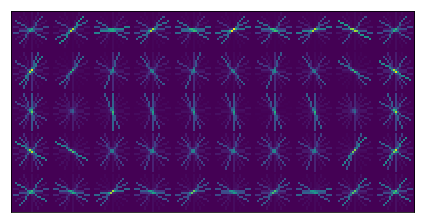

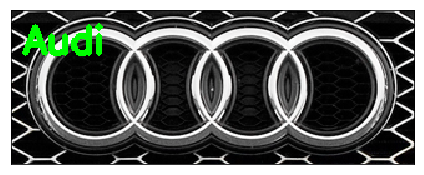

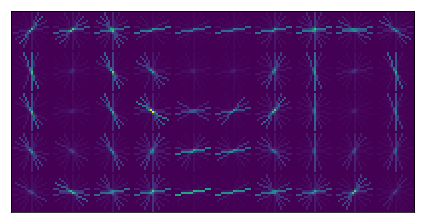

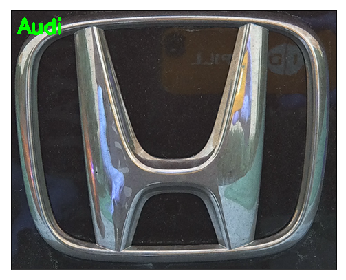

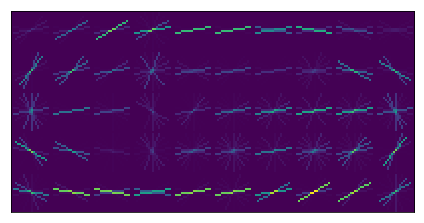

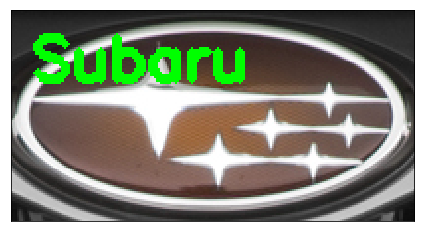

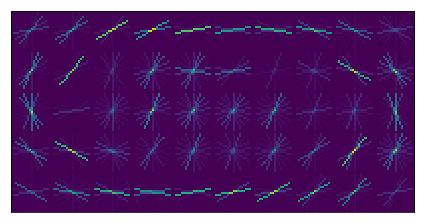

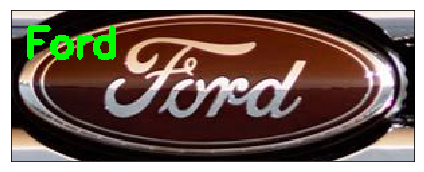

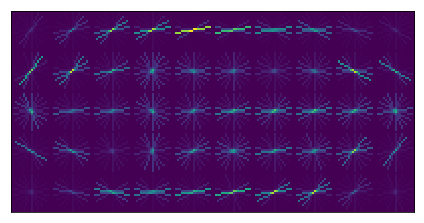

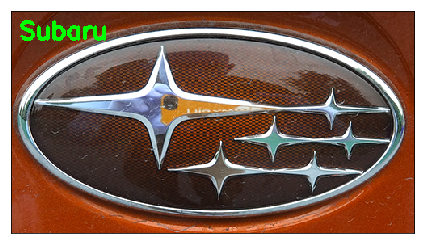

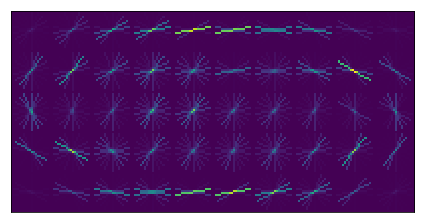

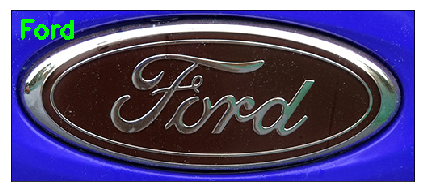

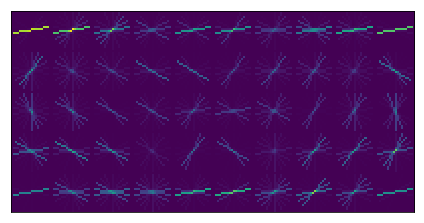

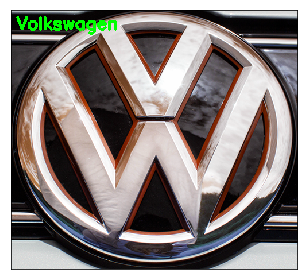

In [142]:
args = {
    'training': '../../db_aulas/Imagens/minibases/logos/car_logos',
    'test': '../../db_aulas/Imagens/minibases/logos/test_images',
}

hog_detectar_texture(args)

In [167]:
def lbp_detectar_texture(args):
    data = []
    labels = []

    for imagePath in paths.list_images(args["training"]):
        # extract the make of the car
        make = imagePath.split("/")[-2]

        # load the image, convert it to grayscale, and detect edges or binarize

        ######[CODE HERE]#######
        img = cv2.imread(imagePath, 0)
        gray = img
        ######[END CODE]#######

        # find contours in the edge map, keeping only the largest one which
        # is presumed to be the car logo

        #####[CODE HERE]#######
        ret,thresh = cv2.threshold(gray,127,255,0)
        im2,cnts,hierarchy = cv2.findContours(thresh, 1, 2)
        c = max(cnts, key=cv2.contourArea)
        #####[END CODE]#######


        # extract the logo of the car and resize it to a canonical width
        # and height
        (x, y, w, h) = cv2.boundingRect(c)
        logo = gray[y:y + h, x:x + w]
        logo = cv2.resize(logo, (200, 100))

        # extract Histogram of Oriented Gradients from the logo
        #####[CODE HERE]#######
#         (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(20, 20), 
#                                     cells_per_block=(2,2), transform_sqrt=True, visualise=True) 
        
        numPoists = 50
        radius = 3
        
        lbp = feature.local_binary_pattern(logo, numPoists, radius, method="uniform")
        (H, _) = np.histogram(lbp.ravel(), bins=range(0, numPoists + 3), range=(0, numPoists+2))
        
        eps = 1e-7
        H = H.astype("float")
        H /= (H.sum() + eps)
        
        #####[END CODE]#######
        # update the data and labels
        data.append(H)
        labels.append(make)

    # "train" the nearest neighbors classifier
    print("[INFO] training classifier...")
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(data, labels)
    print("[INFO] evaluating...")

    for imagePath in paths.list_images(args["test"]):
        # load the test image, convert it to grayscale, and resize it to
        # the canonical size
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        logo = cv2.resize(gray, (200, 100))

        # extract Histogram of Oriented Gradients from the test image and
        # predict the make of the car
#         (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(20, 20),
#                 cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
        
        numPoists = 50
        radius = 3
        
        lbp = feature.local_binary_pattern(logo, numPoists, radius, method="uniform")
        (H, _) = np.histogram(lbp.ravel(), bins=range(0, numPoists + 3), range=(0, numPoists+2))
        
        eps = 1e-7
        H = H.astype("float")
        H /= (H.sum() + eps)
        
        pred = model.predict(H.reshape(1, -1))[0]

        # visualize the HOG image
#         hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
#         hogImage = hogImage.astype("uint8")
#         obj = {'X': hogImage}
#         exibir_imagens(obj)

         # draw the prediction on the test image and display it
        cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
        obj = {'X': image}
        exibir_imagens(obj)

[INFO] training classifier...
[INFO] evaluating...


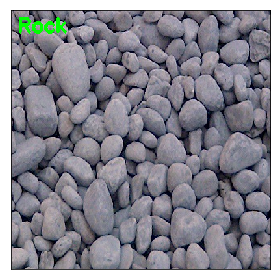

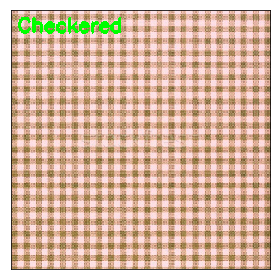

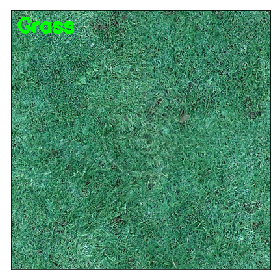

In [168]:
args = {
    'training': '../../db_aulas/Imagens/minibases/textures/train',
    'test': '../../db_aulas/Imagens/minibases/textures/test/',
}

lbp_detectar_texture(args)